This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook

Customarily, we import as follows:


In [190]:
%matplotlib inline
#Above command allows plots to be shown inline.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Object Creation

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s 

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)


In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates,columns=list('ABCD'))

#df = pd.DataFrame(np.random.randn(6,4),
    #Defines what is in the cells of the dataframe

#index=dates,
    #Defines that the index values (rows) will be taken from the variable 'dates' we defined above.

#columns=list('ABCD'))
    #Defines the columns.

In [8]:
df

,A,B,C,D
2013-01-01,0.030809,-0.987374,-1.176340,0.351017
2013-01-02,-0.553716,1.247471,-1.988367,-0.209985
2013-01-03,-0.670835,-0.551412,-0.163361,-0.182903
2013-01-04,0.384647,1.482012,0.453092,0.323812
2013-01-05,-0.689040,1.852333,-0.400498,-1.933439
2013-01-06,0.994081,0.915482,-0.616533,-0.594060


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [19]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(['test','train','test','train']),
                    'F' : 'foo' })

In [20]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [22]:
#All have specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [13]: df2.<TAB>

df2.A                  df2.boxplot

df2.abs                df2.C

df2.add                df2.clip

df2.add_prefix         df2.clip_lower

df2.add_suffix         df2.clip_upper

df2.align              df2.columns

df2.all                df2.combine

df2.any                df2.combineAdd

df2.append             df2.combine_first

df2.apply              df2.combineMult

df2.applymap           df2.compound

df2.as_blocks          df2.consolidate

df2.asfreq             df2.convert_objects

df2.as_matrix          df2.copy

df2.astype             df2.corr

df2.at                 df2.corrwith

df2.at_time            df2.count

df2.axes               df2.cov

df2.B                  df2.cummax

df2.between_time       df2.cummin

df2.bfill              df2.cumprod

df2.blocks             df2.cumsum

df2.bool               df2.D


Viewing Data

In [29]:
#See top and bottom rows of the frame.
#The number in parens determines how many rows willl be seen.  Blank is all.

df.head(2)

,A,B,C,D
2013-01-01,0.030809,-0.987374,-1.176340,0.351017
2013-01-02,-0.553716,1.247471,-1.988367,-0.209985


In [28]:
df.tail(3)

,A,B,C,D
2013-01-04,0.384647,1.482012,0.453092,0.323812
2013-01-05,-0.689040,1.852333,-0.400498,-1.933439
2013-01-06,0.994081,0.915482,-0.616533,-0.594060


Display the index, columns, and the underlying numpy data.

In [33]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [31]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [32]:
df.values

array([[ 0.03080858, -0.98737445, -1.17634037,  0.3510171 ],
       [-0.55371574,  1.24747097, -1.98836736, -0.2099845 ],
       [-0.67083525, -0.55141182, -0.16336078, -0.18290252],
       [ 0.38464688,  1.48201221,  0.45309171,  0.32381194],
       [-0.68904012,  1.8523334 , -0.40049794, -1.93343899],
       [ 0.99408113,  0.91548167, -0.61653277, -0.5940599 ]])

Describe shows a quick statistic summary of your data

In [34]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.084009,0.659752,-0.648668,-0.374259
std,0.682078,1.156643,0.846788,0.843361
min,-0.689040,-0.987374,-1.988367,-1.933439
25%,-0.641555,-0.184688,-1.036388,-0.498041
50%,-0.261454,1.081476,-0.508515,-0.196444
75%,0.296187,1.423377,-0.222645,0.197133
max,0.994081,1.852333,0.453092,0.351017


Transposing your data

In [36]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.030809,-0.553716,-0.670835,0.384647,-0.689040,0.994081
B,-0.987374,1.247471,-0.551412,1.482012,1.852333,0.915482
C,-1.176340,-1.988367,-0.163361,0.453092,-0.400498,-0.616533
D,0.351017,-0.209985,-0.182903,0.323812,-1.933439,-0.594060


Sorting by an axis.

In [42]:
df.sort_index(axis=1,ascending=False)
#axis=0 will sort by the X axis instead.

,D,C,B,A
2013-01-01,0.351017,-1.176340,-0.987374,0.030809
2013-01-02,-0.209985,-1.988367,1.247471,-0.553716
2013-01-03,-0.182903,-0.163361,-0.551412,-0.670835
2013-01-04,0.323812,0.453092,1.482012,0.384647
2013-01-05,-1.933439,-0.400498,1.852333,-0.689040
2013-01-06,-0.594060,-0.616533,0.915482,0.994081


Sorting by values.

In [43]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,0.030809,-0.987374,-1.176340,0.351017
2013-01-03,-0.670835,-0.551412,-0.163361,-0.182903
2013-01-06,0.994081,0.915482,-0.616533,-0.594060
2013-01-02,-0.553716,1.247471,-1.988367,-0.209985
2013-01-04,0.384647,1.482012,0.453092,0.323812
2013-01-05,-0.689040,1.852333,-0.400498,-1.933439


Selection

Note:While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

Selecting a single column, which yields a Series, equivalent to df.A

In [48]:
df['A']

2013-01-01    0.030809
2013-01-02   -0.553716
2013-01-03   -0.670835
2013-01-04    0.384647
2013-01-05   -0.689040
2013-01-06    0.994081
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [50]:
df[0:3]

,A,B,C,D
2013-01-01,0.030809,-0.987374,-1.176340,0.351017
2013-01-02,-0.553716,1.247471,-1.988367,-0.209985
2013-01-03,-0.670835,-0.551412,-0.163361,-0.182903


In [54]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.553716,1.247471,-1.988367,-0.209985
2013-01-03,-0.670835,-0.551412,-0.163361,-0.182903
2013-01-04,0.384647,1.482012,0.453092,0.323812


Selection by Label

For getting a cross section using a label

In [55]:
df.loc[dates[0]]
#Returns the row for the 0-index column.

A    0.030809
B   -0.987374
C   -1.176340
D    0.351017
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [56]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.030809,-0.987374
2013-01-02,-0.553716,1.247471
2013-01-03,-0.670835,-0.551412
2013-01-04,0.384647,1.482012
2013-01-05,-0.689040,1.852333
2013-01-06,0.994081,0.915482


Showing label slicing, both endpoints are included

In [57]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.553716,1.247471
2013-01-03,-0.670835,-0.551412
2013-01-04,0.384647,1.482012


Reduction in the dimensions of the returned object

In [59]:
df.loc['20130102',['A','B']]

A   -0.553716
B    1.247471
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [61]:
df.loc[dates[0],'A']

0.030808580474807484

For getting fast access to a scalar (equiv to the prior method)

In [62]:
df.at[dates[0],'A']

0.030808580474807484

Selection via position:

Select via the position of the passed integers

In [63]:
df.iloc[3]

A    0.384647
B    1.482012
C    0.453092
D    0.323812
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [64]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.384647,1.482012
2013-01-05,-0.689040,1.852333


By lists of integer position locations, similar to the numpy/python style

In [65]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.553716,-1.988367
2013-01-03,-0.670835,-0.163361
2013-01-05,-0.689040,-0.400498


For slicing rows explicitly

In [66]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.553716,1.247471,-1.988367,-0.209985
2013-01-03,-0.670835,-0.551412,-0.163361,-0.182903


For slicing columns explicitly

In [67]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.987374,-1.176340
2013-01-02,1.247471,-1.988367
2013-01-03,-0.551412,-0.163361
2013-01-04,1.482012,0.453092
2013-01-05,1.852333,-0.400498
2013-01-06,0.915482,-0.616533


For getting a value explicitly

In [68]:
df.iloc[1,1]

1.2474709744065822

For getting fast access to a scalar (equiv to the prior method)

In [69]:
df.iat[1,1]

1.2474709744065822

Boolean Indexing

Using a single column’s values to select data.

In [70]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.030809,-0.987374,-1.176340,0.351017
2013-01-04,0.384647,1.482012,0.453092,0.323812
2013-01-06,0.994081,0.915482,-0.616533,-0.594060


A WHERE operation for getting

In [71]:
df[df>0]

,A,B,C,D
2013-01-01,0.030809,NaN,NaN,0.351017
2013-01-02,NaN,1.247471,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,0.384647,1.482012,0.453092,0.323812
2013-01-05,NaN,1.852333,NaN,NaN
2013-01-06,0.994081,0.915482,NaN,NaN


Using the isin() method for filtering

In [72]:
#Adding a column to filter on
df2 = df.copy()

In [75]:
#Adding values to filter on
df2['E'] = ['one', 'one','two','three','four','three']

In [76]:
df2

,A,B,C,D,E
2013-01-01,0.030809,-0.987374,-1.176340,0.351017,one
2013-01-02,-0.553716,1.247471,-1.988367,-0.209985,one
2013-01-03,-0.670835,-0.551412,-0.163361,-0.182903,two
2013-01-04,0.384647,1.482012,0.453092,0.323812,three
2013-01-05,-0.689040,1.852333,-0.400498,-1.933439,four
2013-01-06,0.994081,0.915482,-0.616533,-0.594060,three


In [80]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.670835,-0.551412,-0.163361,-0.182903,two
2013-01-05,-0.689040,1.852333,-0.400498,-1.933439,four


Setting

Setting a new column automatically aligns the data by the indexes

In [81]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [100]:
df['F']=s1

In [101]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label

In [102]:
df.at[dates[0],'A'] = 0

In [103]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.176340,5,NaN
2013-01-02,-0.553716,1.247471,-1.988367,5,1.0
2013-01-03,-0.670835,-0.551412,-0.163361,5,2.0
2013-01-04,0.384647,1.482012,0.453092,5,3.0
2013-01-05,-0.689040,1.852333,-0.400498,5,4.0
2013-01-06,0.994081,0.915482,-0.616533,5,5.0


Setting values by position

In [104]:
df.iat[0,1] = 0

In [105]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.176340,5,NaN
2013-01-02,-0.553716,1.247471,-1.988367,5,1.0
2013-01-03,-0.670835,-0.551412,-0.163361,5,2.0
2013-01-04,0.384647,1.482012,0.453092,5,3.0
2013-01-05,-0.689040,1.852333,-0.400498,5,4.0
2013-01-06,0.994081,0.915482,-0.616533,5,5.0


Setting by assigning numpy array

In [106]:
df.loc[:,'D'] = np.array([5] * len(df))

In [107]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.176340,5,NaN
2013-01-02,-0.553716,1.247471,-1.988367,5,1.0
2013-01-03,-0.670835,-0.551412,-0.163361,5,2.0
2013-01-04,0.384647,1.482012,0.453092,5,3.0
2013-01-05,-0.689040,1.852333,-0.400498,5,4.0
2013-01-06,0.994081,0.915482,-0.616533,5,5.0


A where operation with setting.

In [109]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.176340,-5,NaN
2013-01-02,-0.553716,-1.247471,-1.988367,-5,-1.0
2013-01-03,-0.670835,-0.551412,-0.163361,-5,-2.0
2013-01-04,-0.384647,-1.482012,-0.453092,-5,-3.0
2013-01-05,-0.689040,-1.852333,-0.400498,-5,-4.0
2013-01-06,-0.994081,-0.915482,-0.616533,-5,-5.0


Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [113]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1],'E']=1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.176340,5,NaN,1.0
2013-01-02,-0.553716,1.247471,-1.988367,5,1.0,1.0
2013-01-03,-0.670835,-0.551412,-0.163361,5,2.0,NaN
2013-01-04,0.384647,1.482012,0.453092,5,3.0,NaN


To drop any rows that have missing data

In [114]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.553716,1.247471,-1.988367,5,1.0,1.0


Filling missing data

In [115]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.176340,5,5.0,1.0
2013-01-02,-0.553716,1.247471,-1.988367,5,1.0,1.0
2013-01-03,-0.670835,-0.551412,-0.163361,5,2.0,5.0
2013-01-04,0.384647,1.482012,0.453092,5,3.0,5.0


To get the boolean mask where values are nan

In [116]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


Operations

Operations in general exclude missing data.


Performing a descriptive statistic

In [122]:
df.mean()

A   -0.089144
B    0.824314
C   -0.648668
D    5.000000
F    3.000000
dtype: float64

Same on other axis

In [123]:
df.mean(1)

2013-01-01    0.955915
2013-01-02    0.941078
2013-01-03    1.122878
2013-01-04    2.063950
2013-01-05    1.952559
2013-01-06    2.258606
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [125]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [126]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.670835,-1.551412,-1.163361,4.0,1.0
2013-01-04,-2.615353,-1.517988,-2.546908,2.0,0.0
2013-01-05,-5.689040,-3.147667,-5.400498,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


Applying functions to the data

In [131]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.176340,5,NaN
2013-01-02,-0.553716,1.247471,-3.164708,10,1.0
2013-01-03,-1.224551,0.696059,-3.328069,15,3.0
2013-01-04,-0.839904,2.178071,-2.874977,20,6.0
2013-01-05,-1.528944,4.030405,-3.275475,25,10.0
2013-01-06,-0.534863,4.945886,-3.892008,30,15.0


In [132]:
df.apply(lambda x: x.max() - x.min())

A    1.683121
B    2.403745
C    2.441459
D    0.000000
F    4.000000
dtype: float64

Histogramming

In [134]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [135]:
s

0    0
1    2
2    0
3    1
4    3
5    5
6    2
7    4
8    6
9    6
dtype: int32

In [136]:
s.value_counts()

6    2
2    2
0    2
5    1
4    1
3    1
1    1
dtype: int64

Series Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [137]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [139]:
s.str.lower()
#lower() makes everything lower case

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

Merge/Concatenate

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section

Concatenating pandas objects together with concat():

In [140]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,0.205443,-0.860459,0.681564,-0.265862
1,0.474924,1.024937,1.207668,-0.270978
2,-0.334177,-0.275441,1.422924,-0.753395
3,-0.257874,-0.036421,0.674942,-0.414084
4,2.699226,-0.631530,0.914097,-0.779423
5,0.483161,-1.088239,-0.539259,0.407843
6,1.313376,-0.476141,2.026150,-0.597566
7,-0.080038,1.046797,0.428996,0.104484
8,1.185105,1.034797,-0.055182,1.685591
9,1.227710,-1.258060,0.390075,0.981106


In [141]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [142]:
pieces

[          0         1         2         3
 0  0.205443 -0.860459  0.681564 -0.265862
 1  0.474924  1.024937  1.207668 -0.270978
 2 -0.334177 -0.275441  1.422924 -0.753395,
           0         1         2         3
 3 -0.257874 -0.036421  0.674942 -0.414084
 4  2.699226 -0.631530  0.914097 -0.779423
 5  0.483161 -1.088239 -0.539259  0.407843
 6  1.313376 -0.476141  2.026150 -0.597566,
           0         1         2         3
 7 -0.080038  1.046797  0.428996  0.104484
 8  1.185105  1.034797 -0.055182  1.685591
 9  1.227710 -1.258060  0.390075  0.981106]

In [143]:
pd.concat(pieces)

,0,1,2,3
0,0.205443,-0.860459,0.681564,-0.265862
1,0.474924,1.024937,1.207668,-0.270978
2,-0.334177,-0.275441,1.422924,-0.753395
3,-0.257874,-0.036421,0.674942,-0.414084
4,2.699226,-0.631530,0.914097,-0.779423
5,0.483161,-1.088239,-0.539259,0.407843
6,1.313376,-0.476141,2.026150,-0.597566
7,-0.080038,1.046797,0.428996,0.104484
8,1.185105,1.034797,-0.055182,1.685591
9,1.227710,-1.258060,0.390075,0.981106


Join

In [145]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [147]:
left

,key,lval
0,foo,1
1,foo,2


In [148]:
right

,key,rval
0,foo,4
1,foo,5


In [150]:
pd.merge(left,right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Append

Append rows to a dataframe. See the Appending

In [151]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

df

,A,B,C,D
0,-0.681473,0.232656,-0.271286,-1.142345
1,0.071885,1.277702,0.682111,-1.422700
2,-1.132614,-0.649178,0.265805,-0.817716
3,-1.414819,0.843804,-0.575356,1.142347
4,-0.017996,-0.123055,0.196892,-0.423589
5,-0.488425,-0.219265,-0.567851,1.537221
6,-1.091648,-0.932577,0.007561,-0.713309
7,0.835943,-1.069724,0.498012,-0.841369


In [152]:
s = df.iloc[3]

In [153]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.681473,0.232656,-0.271286,-1.142345
1,0.071885,1.277702,0.682111,-1.422700
2,-1.132614,-0.649178,0.265805,-0.817716
3,-1.414819,0.843804,-0.575356,1.142347
4,-0.017996,-0.123055,0.196892,-0.423589
5,-0.488425,-0.219265,-0.567851,1.537221
6,-1.091648,-0.932577,0.007561,-0.713309
7,0.835943,-1.069724,0.498012,-0.841369
8,-1.414819,0.843804,-0.575356,1.142347


Grouping

By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

In [155]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-0.884892,-0.542452
1,bar,one,-0.471299,-0.650034
2,foo,two,0.613544,1.323490
3,bar,three,1.144898,0.476951
4,foo,two,0.751191,1.776547
5,bar,two,0.315752,-1.516059
6,foo,one,0.321989,-0.493943
7,foo,three,0.716205,0.517509


Grouping and then applying a function sum to the resulting groups.

In [156]:
df.groupby('A').sum()

,C,D
A,,
bar,0.989350,-1.689141
foo,1.518037,2.581151


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [157]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.471299 -0.650034
    three  1.144898  0.476951
    two    0.315752 -1.516059
foo one   -0.562903 -1.036395
    three  0.716205  0.517509
    two    1.364736  3.100037

Reshaping

Stack

In [159]:

tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df2 = df[:4]

df2

A         B
first second                    
bar   one    -0.461144  0.669775
      two     1.250632 -2.570573
baz   one     0.782524 -1.165663
      two     1.005232 -1.012559

The stack() method “compresses” a level in the DataFrame’s columns.

In [160]:
stacked = df2.stack()

stacked

first  second   
bar    one     A   -0.461144
               B    0.669775
       two     A    1.250632
               B   -2.570573
baz    one     A    0.782524
               B   -1.165663
       two     A    1.005232
               B   -1.012559
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [161]:
stacked.unstack()

A         B
first second                    
bar   one    -0.461144  0.669775
      two     1.250632 -2.570573
baz   one     0.782524 -1.165663
      two     1.005232 -1.012559

In [162]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.461144  1.250632
      B  0.669775 -2.570573
baz   A  0.782524  1.005232
      B -1.165663 -1.012559

In [163]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.461144  0.782524
       B  0.669775 -1.165663
two    A  1.250632  1.005232
       B -2.570573 -1.012559

Pivot Tables

In [164]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section

In [165]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample('5Min').sum()

2012-01-01    25116
Freq: 5T, dtype: int32

Time zone representation

In [167]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -0.123366
2012-03-07    1.399853
2012-03-08   -0.689495
2012-03-09   -0.393915
2012-03-10    1.226280
Freq: D, dtype: float64

In [168]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00   -0.123366
2012-03-07 00:00:00+00:00    1.399853
2012-03-08 00:00:00+00:00   -0.689495
2012-03-09 00:00:00+00:00   -0.393915
2012-03-10 00:00:00+00:00    1.226280
Freq: D, dtype: float64

Convert to another time zone

In [169]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.123366
2012-03-06 19:00:00-05:00    1.399853
2012-03-07 19:00:00-05:00   -0.689495
2012-03-08 19:00:00-05:00   -0.393915
2012-03-09 19:00:00-05:00    1.226280
Freq: D, dtype: float64

Converting between time span representations

In [170]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -0.077360
2012-02-29    0.486028
2012-03-31    0.159718
2012-04-30    1.759349
2012-05-31    0.750563
Freq: M, dtype: float64

In [171]:
ps = ts.to_period()

ps

2012-01   -0.077360
2012-02    0.486028
2012-03    0.159718
2012-04    1.759349
2012-05    0.750563
Freq: M, dtype: float64

In [172]:
ps.to_timestamp()

2012-01-01   -0.077360
2012-02-01    0.486028
2012-03-01    0.159718
2012-04-01    1.759349
2012-05-01    0.750563
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [173]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

ts.head()

1990-03-01 09:00   -0.814953
1990-06-01 09:00    0.665986
1990-09-01 09:00    0.246720
1990-12-01 09:00    0.178114
1991-03-01 09:00    1.122614
Freq: H, dtype: float64

Categoricals

In [175]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type.

In [176]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [178]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [179]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [180]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [181]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

Plotting

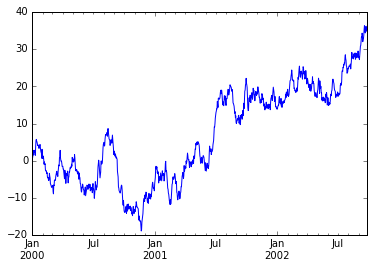

In [189]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()


If the index consists of dates, it calls gcf().autofmt_xdate() to try to format the x-axis nicely as per above.

On DataFrame, plot() is a convenience to plot all of the columns with labels:

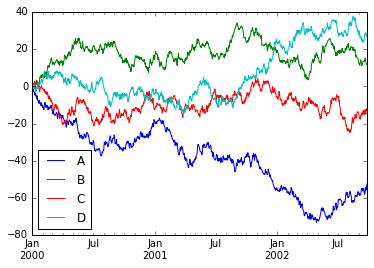

In [191]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()

plt.figure(); df.plot();

You can plot one column versus another using the x and y keywords in plot():

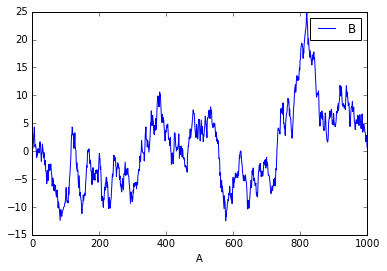

In [192]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

df3['A'] = pd.Series(list(range(len(df))))

df3.plot(x='A', y='B')

Other Plots

Plotting methods allow for a handful of plot styles other than the default Line plot. These methods can be provided as the kind keyword argument to plot(). These include:

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or 'density' for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

For example, a bar plot can be created the following way:

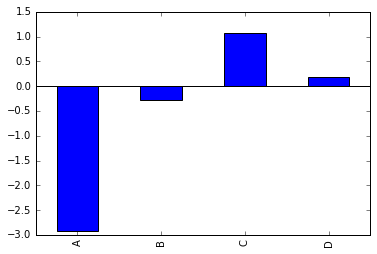

In [193]:
plt.figure();

df.ix[5].plot(kind='bar'); plt.axhline(0, color='k')

You can also create these other plots using the methods DataFrame.plot.<kind> instead of providing the kind keyword argument. This makes it easier to discover plot methods and the specific arguments they use:

In [13]: df = pd.DataFrame()

In [14]: df.plot.<TAB>
df.plot.area     df.plot.barh     df.plot.density  df.plot.hist     df.plot.line     df.plot.scatter
df.plot.bar      df.plot.box      df.plot.hexbin   df.plot.kde      df.plot.pie

In addition to these kind s, there are the DataFrame.hist(), and DataFrame.boxplot() methods, which use a separate interface.

Finally, there are several plotting functions in pandas.tools.plotting that take a Series or DataFrame as an argument. These include

Scatter Matrix
Andrews Curves
Parallel Coordinates
Lag Plot
Autocorrelation Plot
Bootstrap Plot
RadViz
Plots may also be adorned with errorbars or tables.

Getting Data In/Out

Writing to a CSV file

In [197]:
df.to_csv('foo.csv')

#The csv appears in the same directory as the notebook.

Reading from a csv file

In [196]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.706620,-1.161688,0.099580,1.910567
1,2000-01-02,-1.301425,-0.241876,0.505881,0.704413
2,2000-01-03,-1.466749,-0.714582,1.131817,-0.090220
3,2000-01-04,-1.268877,-0.674117,1.456098,-0.849111
4,2000-01-05,-2.817786,-0.974213,1.525343,-1.251521
5,2000-01-06,-2.912346,-0.284558,1.077543,0.179057
6,2000-01-07,-3.776506,-0.656286,2.560434,1.176466
7,2000-01-08,-3.170526,-0.957435,2.705603,1.342401
8,2000-01-09,-4.737681,-1.133429,2.377678,-1.178586
9,2000-01-10,-4.305008,-1.526970,2.245310,-2.629415


HDF5

Reading and writing to HDFStores

Writing to a HDF5 Store

In [200]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [201]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.706620,-1.161688,0.099580,1.910567
2000-01-02,-1.301425,-0.241876,0.505881,0.704413
2000-01-03,-1.466749,-0.714582,1.131817,-0.090220
2000-01-04,-1.268877,-0.674117,1.456098,-0.849111
2000-01-05,-2.817786,-0.974213,1.525343,-1.251521
2000-01-06,-2.912346,-0.284558,1.077543,0.179057
2000-01-07,-3.776506,-0.656286,2.560434,1.176466
2000-01-08,-3.170526,-0.957435,2.705603,1.342401
2000-01-09,-4.737681,-1.133429,2.377678,-1.178586
2000-01-10,-4.305008,-1.526970,2.245310,-2.629415


Reading and writing to MS Excel

Writing to an excel file

In [198]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [199]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.706620,-1.161688,0.099580,1.910567
2000-01-02,-1.301425,-0.241876,0.505881,0.704413
2000-01-03,-1.466749,-0.714582,1.131817,-0.090220
2000-01-04,-1.268877,-0.674117,1.456098,-0.849111
2000-01-05,-2.817786,-0.974213,1.525343,-1.251521
2000-01-06,-2.912346,-0.284558,1.077543,0.179057
2000-01-07,-3.776506,-0.656286,2.560434,1.176466
2000-01-08,-3.170526,-0.957435,2.705603,1.342401
2000-01-09,-4.737681,-1.133429,2.377678,-1.178586
2000-01-10,-4.305008,-1.526970,2.245310,-2.629415
